In [1]:
import pandas as pd
import numpy as np
import random as rnd


import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.svm as svm
import sklearn.metrics
from matplotlib import pyplot


In [5]:
#Importation des données
train = pd.read_csv('./../Data/train.csv')
test = pd.read_csv('./../Data/test.csv')
gender_submission = pd.read_csv('./../Data/gender_submission.csv')

In [6]:
#Visualisation
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
#Visualisation
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [181]:
#Visualisation

gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [182]:
train['Cabin?'] = np.where(pd.isnull(train['Cabin']), 0,1)
predictors = ['Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin?', 'Embarked']

In [183]:
#Suppression des valeurs Nan + maj 
def impute_age(cols):
    age = cols[0]
    sex = cols[1]
    pclass = cols[2]
    if pd.isnull(age):
        if sex == 'female':
            if pclass == 1:
                return 35
            elif pclass == 2:
                return 28
            elif pclass == 3:
                return 21.5
            else:
                return np.nan
        elif sex == 'male':
            if pclass == 1:
                return 40
            elif pclass == 2:
                return 30
            elif pclass == 3:
                return 25
            else:
                return np.nan
    else:
        return age

    
train['Age']=train[['Age','Sex','Pclass']].apply(impute_age,axis=1)

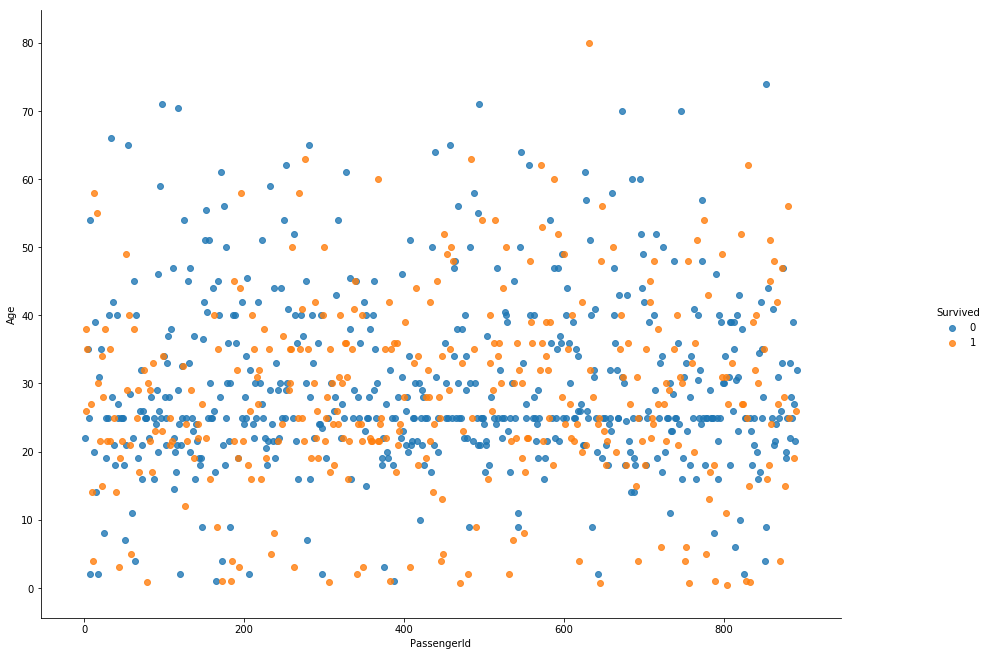

In [245]:
#analyse des gens qui survivent en fonction de l'Age
import seaborn as sns
sns.lmplot( 'PassengerId','Age', train, hue='Survived', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

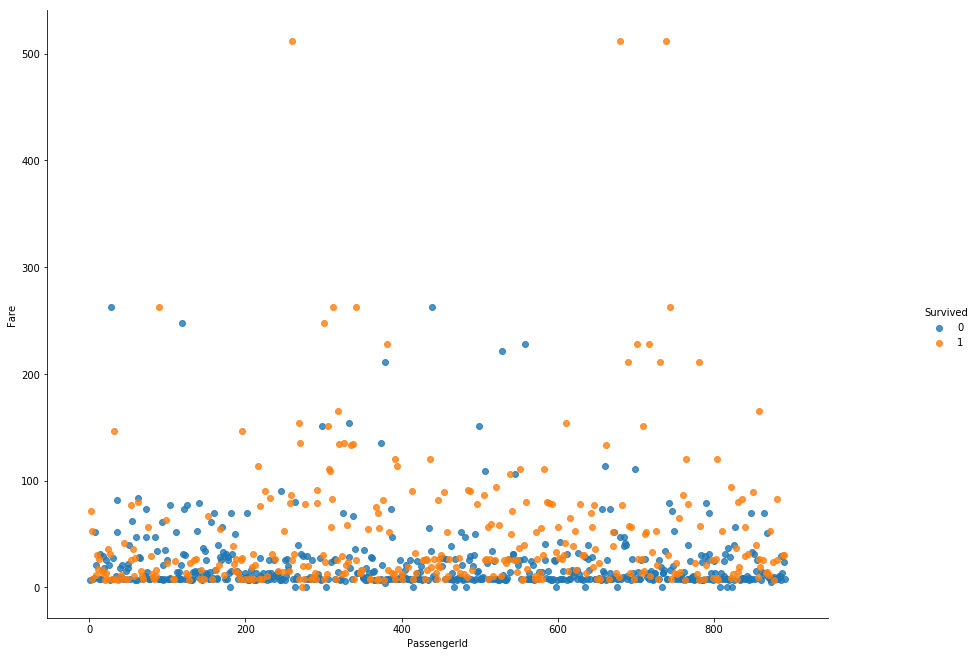

In [246]:
#analyse des gens qui survivent en fonction de l'Age
import seaborn as sns
sns.lmplot( 'PassengerId','Fare', train, hue='Survived', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

In [185]:
male = pd.get_dummies(train['Sex'], drop_first=True)
port = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train, male, port],axis=1)
train[pd.isnull(train['Embarked'])==True]
train.loc[61,'Q']=0.33
train.loc[61,'S']=0.33
train.loc[829,'Q']=0.33
train.loc[829,'S']=0.33
predictors_num = ['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin?', 'Q','S']

In [186]:
X_tr, X_test, y_tr, y_test = sklearn.model_selection.train_test_split(train[predictors_num],train['Survived'], random_state = 1)

In [187]:
X_tr

,Pclass,male,Age,SibSp,Parch,Fare,Cabin?,Q,S
35,1,1,42.00,1,0,52.0000,0,0.0,1.0
46,3,1,25.00,1,0,15.5000,0,1.0,0.0
453,1,1,49.00,1,0,89.1042,1,0.0,0.0
291,1,0,19.00,1,0,91.0792,1,0.0,0.0
748,1,1,19.00,1,0,53.1000,1,0.0,1.0
41,2,0,27.00,1,0,21.0000,0,0.0,1.0
224,1,1,38.00,1,0,90.0000,1,0.0,1.0
340,2,1,2.00,1,1,26.0000,1,0.0,1.0
125,3,1,12.00,1,0,11.2417,0,0.0,0.0
803,3,1,0.42,0,1,8.5167,0,0.0,0.0


## Test Modele (A ne pas lancer)

In [80]:
sup_vec = svm.SVC(gamma = 'scale')
sup_vec.fit(X_tr, y_tr)
predictions = sup_vec.predict(X_test)
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[117,  11],
       [ 69,  26]])

In [81]:
sup_vec = svm.LinearSVC(max_iter=1000000)
sup_vec.fit(X_tr, y_tr)
predictions = sup_vec.predict(X_test)
sklearn.metrics.confusion_matrix(y_test,predictions)

/Users/adjmalbourhane/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[113,  15],
       [ 28,  67]])

In [82]:
preds = ['Pclass', 'male', 'Age', 'Fare', 'Cabin?']
# should be more than enough. Now let's look at both of those models again
sup_vec_C = svm.SVC(gamma = 'scale')
sup_vec_C.fit(X_tr[preds], y_tr)
predictions = sup_vec_C.predict(X_test[preds])
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[112,  16],
       [ 67,  28]])

In [83]:
sup_vec_L = svm.LinearSVC(max_iter=1000000)
sup_vec_L.fit(X_tr[preds], y_tr)
predictions = sup_vec_L.predict(X_test[preds])
sklearn.metrics.confusion_matrix(y_test,predictions)

/Users/adjmalbourhane/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[110,  18],
       [ 26,  69]])

In [84]:
print("RBF: "+str(sup_vec_C.fit_status_))

RBF: 0


In [87]:
sup_vec_Q = svm.SVC(gamma = 'scale', kernel='poly', degree=2)
sup_vec_Q.fit(X_tr[preds], y_tr)
predictions = sup_vec_Q.predict(X_test[preds])
print(sklearn.metrics.confusion_matrix(y_test,predictions))
print('fit status: '+str(sup_vec_Q.fit_status_))

[[124   4]
 [ 83  12]]
fit status: 0


In [89]:
sup_vec_Lin = svm.SVC(gamma = 'scale', kernel='linear')
sup_vec_Lin.fit(X_tr[preds], y_tr)
predictions = sup_vec_Lin.predict(X_test[preds])
print(sklearn.metrics.confusion_matrix(y_test,predictions))
print('fit status:' + str(sup_vec_Lin.fit_status_))

[[111  17]
 [ 31  64]]
fit status:0


In [90]:
sup_vec_Lin.coef_

array([[-2.13921276e-03, -1.00043252e+00, -1.00043252e+00,
        -1.40220280e-04, -1.89808794e-06,  3.02607873e-03]])

In [91]:
pre = ['Pclass', 'male', 'Age', 'Cabin?']
models = [1,2,3]
for i in models:
    if i == 1:
        sup_vec = svm.SVC(gamma = 'scale', kernel='linear')
    else:
        sup_vec = svm.SVC(gamma = 'scale', kernel = 'poly', degree = i)
    sup_vec.fit(X_tr[pre], y_tr)
    predictions = sup_vec.predict(X_test[pre])
    print('Model degree '+str(i)+' confusion matrix:')
    print(sklearn.metrics.confusion_matrix(y_test,predictions))
    print('fit status: '+str(sup_vec.fit_status_))

Model degree 1 confusion matrix:
[[111  17]
 [ 31  64]]
fit status: 0
Model degree 2 confusion matrix:
[[127   1]
 [ 86   9]]
fit status: 0
Model degree 3 confusion matrix:
[[127   1]
 [ 83  12]]
fit status: 0


## Modele retenu (Poly : le moins pire)

In [188]:
sup_vec_Q = svm.SVC(gamma = 'scale', kernel='poly', degree=2)
sup_vec_Q.fit(train[preds], train['Survived'])
#nettoyage des données
test['Cabin?'] = np.where(pd.isnull(test['Cabin']), 0,1)

# remplacement des données manquantes
test['Age']=test[['Age','Sex','Pclass']].apply(impute_age,axis=1)

sex = pd.get_dummies(test['Sex'])
port = pd.get_dummies(test['Embarked'])
sex.drop('female', axis = 1, inplace=True)
port.drop('C', axis = 1, inplace = True)
test = pd.concat([test, sex, port],axis=1)
# and there are no missing values for port this time

# remplacemnt des valeurs manquantes par la mediane
test['Fare']=np.where(pd.isnull(test['Fare'])==True, 7.8958, test['Fare'])

predictions = sup_vec_Q.predict(test[preds])
print(sklearn.metrics.confusion_matrix(y_test,predictions[0:223]))
final = pd.DataFrame(predictions, columns = ['Survived'])


[[115  13]
 [ 85  10]]


In [192]:
#classe predicte
output = pd.concat([test['PassengerId'],final], axis=1)
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [205]:
fpr, tpr, thresholds = roc_curve(y_test, predictions[0:223])

In [208]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, predictions[0:223])
print('AUC: %.3f' % auc)

AUC: 0.502


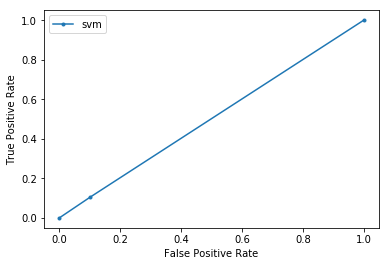

In [217]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions[0:223])

pyplot.plot(lr_fpr, lr_tpr, marker='.', label='svm')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [219]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
precision, recall, thresholds = precision_recall_curve(y_test, predictions[0:223])

In [221]:
f1 = f1_score(y_test, predictions[0:223])